In [13]:
%cd drive/MyDrive/A

/content/drive/MyDrive/A


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import string
from collections import defaultdict


df = pd.read_csv('alphabets_28x28.csv', low_memory= False, on_bad_lines='skip')  #Read the csv file
df = df.dropna()  # Drop rows with missing values

# Assuming the dataset has columns ['label', 'pixel1', 'pixel2', ..., 'pixel784']
labels = df['label'].values
images = df.drop('label', axis=1).values

# Create a mapping from characters to numbers
char_to_num = {char: idx for idx, char in enumerate(string.ascii_uppercase)}
num_to_char = {idx: char for char, idx in char_to_num.items()}

# Filter the dataset to include only valid labels
valid_indices = [i for i, label in enumerate(labels) if label in char_to_num]
labels = labels[valid_indices]
images = images[valid_indices]

# Convert labels from characters to numbers
labels = [char_to_num[char] for char in labels]
labels = np.array(labels)

# Convert to categorical
num_classes = len(char_to_num)
labels = tf.keras.utils.to_categorical(labels, num_classes)

# Normalize the pixel values to [0, 1]
images = images.astype(np.float32) / 255.0

# Reshape images to (28, 28, 1)
images = images.reshape(-1, 28, 28, 1)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [2]:
#Training a keras model for handwritten alphabet recognition

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

])
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)  #Accuracy of the model

Epoch 1/10
2018/2018 [==============================] - 128s 63ms/step - loss: 0.1340 - accuracy: 0.9568 - val_loss: 0.0441 - val_accuracy: 0.9872
Epoch 2/10
2018/2018 [==============================] - 119s 59ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 3/10
2018/2018 [==============================] - 83s 41ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 4/10
2018/2018 [==============================] - 74s 37ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0176 - val_accuracy: 0.9947
Epoch 5/10
2018/2018 [==============================] - 72s 36ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0214 - val_accuracy: 0.9947
Epoch 6/10
2018/2018 [==============================] - 100s 49ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0225 - val_accuracy: 0.9947
Epoch 7/10
2018/2018 [==============================] - 121s 60ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.01

In [4]:
model.save('model.keras')

In [6]:
#Sentiment Analysis for the given dataset

from sklearn.model_selection import train_test_split

data = pd.read_csv('sentiment_analysis_dataset.csv')

category_mapping = {
    'Angry': 0,
    'Happy': 1,
    'Neutral': 2
}
data['sentiment'] = data['sentiment'].apply(lambda x: category_mapping[x])

X = data['line']
y = data['sentiment']



In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10000) #For word count
X_vect = vectorizer.fit_transform(X)

In [8]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()   #Using the naive bayes theorem, for the classification
classifier.fit(X_vect, y)

MultinomialNB()

              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        10
       Happy       1.00      1.00      1.00        10
     Neutral       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



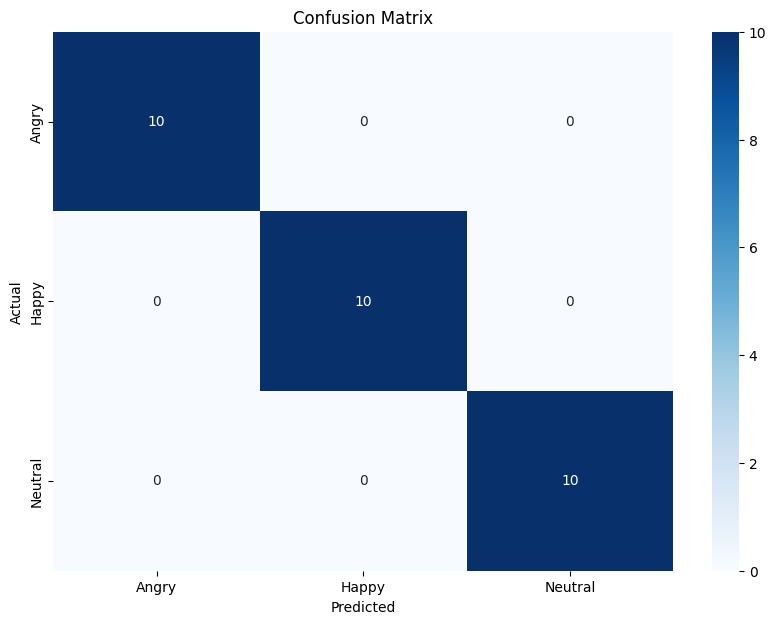

In [9]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_vect)
print(classification_report(y, y_pred, target_names=category_mapping.keys()))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [10]:
from pickle import dump
with open("classifier.pkl", "wb") as f:  # Save the classifier to a file
    dump(classifier, f, protocol=5)

In [11]:
from PIL import Image


# test.png => location_of_image
img1 = Image.open(r"line_1.png")
img_arr1 = np.asarray(img1).astype(np.float32) / 255.0  #Converting the image to numpy array and dividing by 255 for it to be between 0 and 1
img2 = Image.open(r"line_2.png")
img_arr2 = np.asarray(img2).astype(np.float32) / 255.0
img3 = Image.open(r"line_3.png")
img_arr3 = np.asarray(img3).astype(np.float32) / 255.0
img4 = Image.open(r"line_4.png")
img_arr4 = np.asarray(img4).astype(np.float32) / 255.0
img5 = Image.open(r"line_5.png")
img_arr5 = np.asarray(img5).astype(np.float32) / 255.0
img6 = Image.open(r"line_6.png")
img_arr6 = np.asarray(img6).astype(np.float32) / 255.0

In [14]:
l1=[]

for i in range(img_arr1.shape[0] // 28):
    for j in range(img_arr1.shape[1] // 28):
      new_arr1 = img_arr1[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr1 = new_arr1.reshape(1, 28, 28, 1)

      if new_arr1.sum()==0.0:
          l1.append(" ")
      else:
          pred = model.predict(new_arr1).argmax(axis=1)
          l1.append(num_to_char[pred[0]])

print(l1)
v1 = vectorizer.transform(l1)  #Using the word counts on the trained data for prediction
value1=classifier.predict(v1)



l2=[]

for i in range(img_arr2.shape[0] // 28):
    for j in range(img_arr2.shape[1] // 28):
      new_arr2 = img_arr2[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr2 = new_arr2.reshape(1, 28, 28, 1)

      if new_arr2.sum()==0.0:
          l2.append(" ")
      else:
          pred = model.predict(new_arr2).argmax(axis=1)
          l2.append(num_to_char[pred[0]])

print(l2)
v2 = vectorizer.transform(l2)  #Using the word counts on the trained data for prediction
value2=classifier.predict(v2)


l3=[]

for i in range(img_arr3.shape[0] // 28):
    for j in range(img_arr3.shape[1] // 28):
      new_arr3 = img_arr3[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr3 = new_arr3.reshape(1, 28, 28, 1)

      if new_arr3.sum()==0.0:
          l3.append(" ")
      else:
          pred = model.predict(new_arr3).argmax(axis=1)
          l3.append(num_to_char[pred[0]])

print(l3)
v3 = vectorizer.transform(l3)  #Using the word counts on the trained data for prediction
value3=classifier.predict(v3)



l4=[]

for i in range(img_arr4.shape[0] // 28):
    for j in range(img_arr4.shape[1] // 28):
      new_arr4 = img_arr4[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr4 = new_arr4.reshape(1, 28, 28, 1)

      if new_arr4.sum()==0.0:
          l4.append(" ")
      else:
          pred = model.predict(new_arr4).argmax(axis=1)
          l4.append(num_to_char[pred[0]])

print(l4)
v4 = vectorizer.transform(l4)  #Using the word counts on the trained data for prediction
value4=classifier.predict(v4)



l5=[]

for i in range(img_arr5.shape[0] // 28):
    for j in range(img_arr5.shape[1] // 28):
      new_arr5 = img_arr5[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr5 = new_arr5.reshape(1, 28, 28, 1)

      if new_arr5.sum()==0.0:
          l5.append(" ")
      else:
          pred = model.predict(new_arr5).argmax(axis=1)
          l5.append(num_to_char[pred[0]])

print(l5)
v5 = vectorizer.transform(l5)  #Using the word counts on the trained data for prediction
value5=classifier.predict(v5)




l6=[]

for i in range(img_arr6.shape[0] // 28):
    for j in range(img_arr6.shape[1] // 28):
      new_arr6 = img_arr6[i*28:(i+1)*28, j*28:(j+1)*28]
      new_arr6 = new_arr6.reshape(1, 28, 28, 1)

      if new_arr6.sum()==0.0:
          l6.append(" ")
      else:
          pred = model.predict(new_arr6).argmax(axis=1)
          l6.append(num_to_char[pred[0]])

print(l6)
v6 = vectorizer.transform(l6)  #Using the word counts on the trained data for prediction
value6=classifier.predict(v6)



1/1 [==============================] - 0s 27ms/step
['C', ' ', 'A', 'A', ' ', 'C', 'E', 'A', 'H', 'C', 'H', ' ', 'A', 'H', 'H', 'D', 'H', 'E', 'D', ' ', 'B', 'H', ' ', 'H', 'D', 'H', 'E', ' ', 'C', 'D', 'H', 'D', 'A', 'A', 'H', 'C', ' ', 'C', 'D', 'A', 'A', 'C', 'A', 'C', 'H', 'C', 'H', 'G', ' ', 'A', 'H', 'D', ' ', 'H', 'D', 'G', ' ', 'H', 'E', 'H', 'E', 'A', ' ', 'D', 'F', 'F', 'E', 'A', ' ', 'A', 'H', 'H', ' ', 'G', 'D', 'C', 'H', 'D', 'C', 'D', 'H', 'D', ' ', 'H', 'H', 'C', 'C', 'H', ' ', 'C', 'D', ' ', 'H', 'E', 'B', 'H', ' ', 'C', 'H', 'H', 'E', 'C', 'H', 'F', 'H', 'C', ' ', 'A', 'D', 'D', ' ', 'H', 'E', 'G', 'A', 'C', 'C', 'H', 'E', ' ']
1/1 [==============================] - 0s 34ms/step
['C', 'F', ' ', 'D', 'E', ' ', 'F', 'B', 'C', 'G', 'C', 'E', 'A', 'C', 'C', 'D', 'G', ' ', 'A', 'H', 'A', 'F', ' ', 'H', 'D', 'C', ' ', 'H', 'E', 'H', 'E', 'A', ' ', 'F', 'A', 'H', ' ', 'A', 'C', 'D', 'E', 'H', 'C', 'C', 'D', 'H', ' ', 'D', 'C', 'E', 'C', 'H', 'G', ' ', 'D', 'D', 'D', 'C', 'D',